In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
data = pd.read_csv('data/fake_job_postings.csv', encoding = 'utf-8')


In [93]:
df = data.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [85]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [121]:
data.isnull().sum() / 17880 * 100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [3]:
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [5]:
data_fraudulent = data[data['fraudulent'] == 1]
data_not_fraudulent = data[data['fraudulent'] == 0]


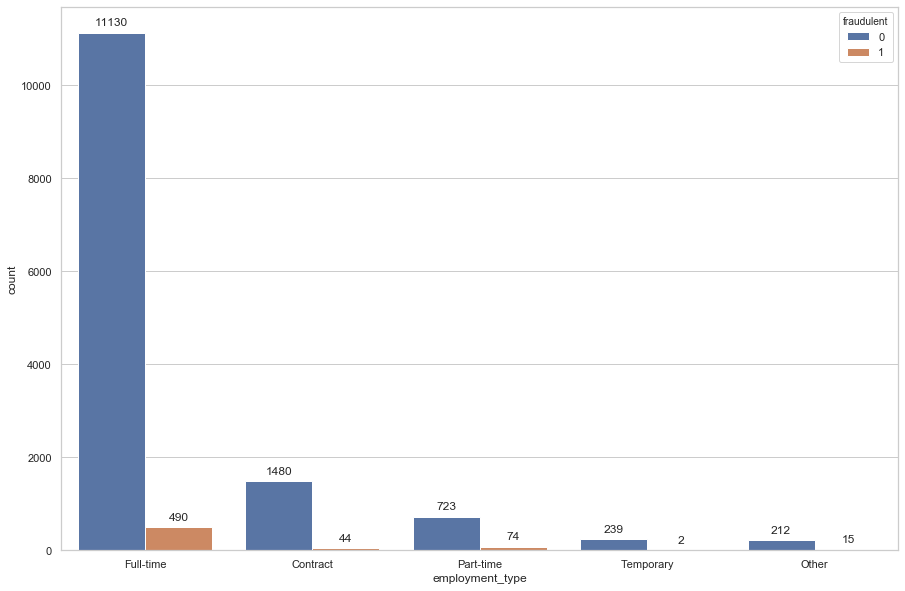

In [116]:
plt.figure(figsize = (15,10))

plot = sns.countplot(x = df.employment_type, hue = df.fraudulent ,
              order = df.employment_type.value_counts().index)

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

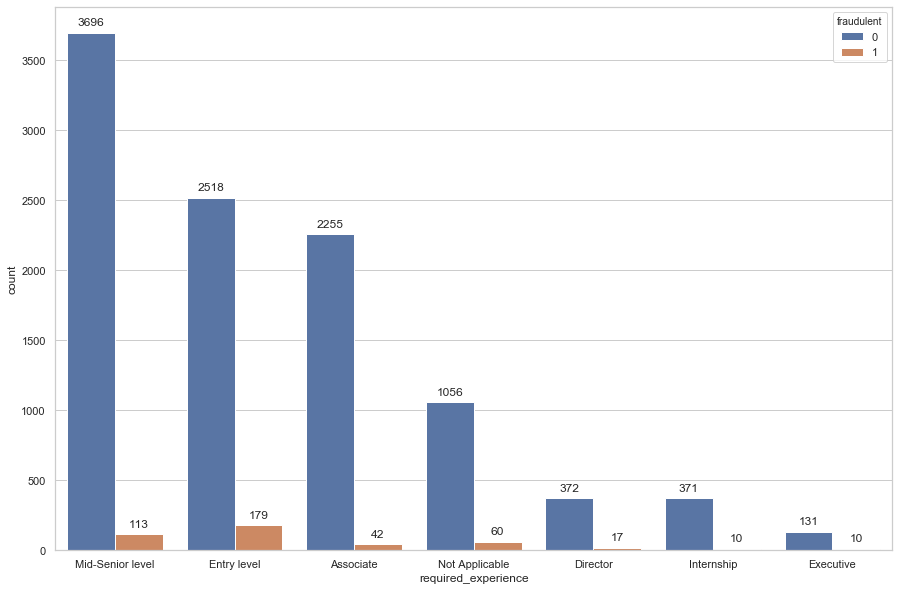

In [117]:
plt.figure(figsize = (15,10))

plot = sns.countplot(x = df.required_experience, hue = df.fraudulent ,
              order = df.required_experience.value_counts().index)

for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

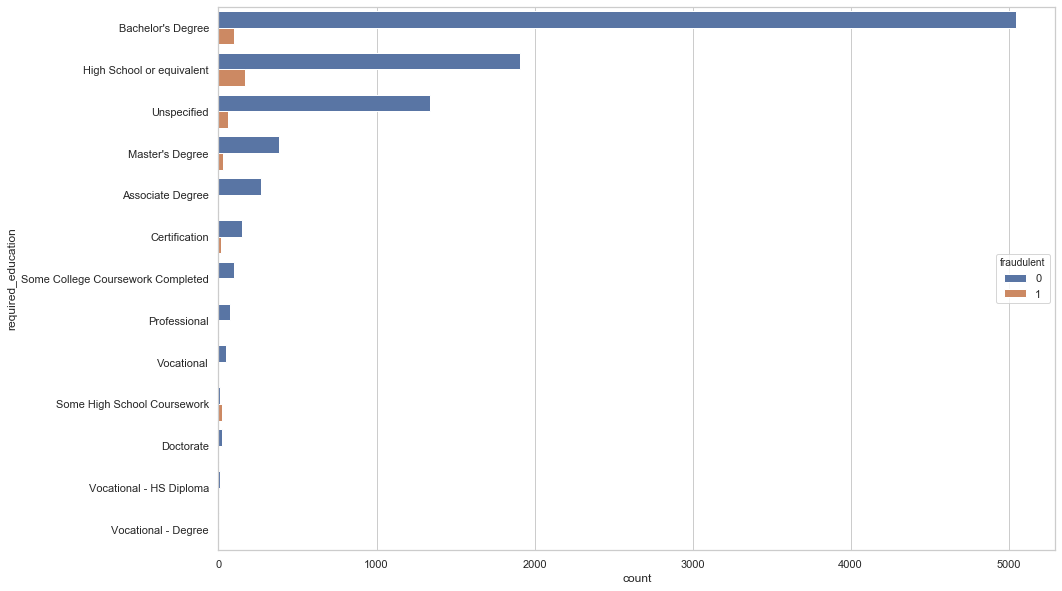

In [123]:
plt.figure(figsize = (15,10))

plot = sns.countplot(y = df.required_education, hue = df.fraudulent ,
              order = df.required_education.value_counts().index)


In [80]:
data.location.value_counts()

GB, LND, London            718
US, NY, New York           658
US, CA, San Francisco      472
GR, I, Athens              464
US, ,                      339
                          ... 
US, TX, Abernathy            1
US, FL, TAMPA                1
MU, QB,                      1
US, FL, S. Florida Area      1
SA, , Jeddah                 1
Name: location, Length: 3105, dtype: int64

In [11]:
(data_fraudulent.isnull().sum() / 866) * 100

job_id                  0.000000
title                   0.000000
location                2.193995
department             61.316397
salary_range           74.249423
company_profile        67.782910
description             0.115473
requirements           17.782910
benefits               42.032333
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

In [9]:
data_not_fraudulent.isnull().sum()

job_id                     0
title                      0
location                 327
department             11016
salary_range           14369
company_profile         2721
description                0
requirements            2541
benefits                6846
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3230
required_experience     6615
required_education      7654
industry                4628
function                6118
fraudulent                 0
dtype: int64

In [78]:
df2 = data_fraudulent[['title','fraudulent']]
df2


,title,fraudulent
98,IC&E Technician,1
144,Forward Cap.,1
173,Technician Instrument & Controls,1
180,Sales Executive,1
215,IC&E Technician Mt Poso,1
...,...,...
17827,Student Positions Part-Time and Full-Time.,1
17828,Sales Associate,1
17829,Android Developer,1
17830,Payroll Clerk,1


In [37]:
data_fraudulent.iloc[:,1].value_counts() 


Cruise Staff Wanted *URGENT*                                       21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Data Entry Admin/Clerical Positions - Work From Home               21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
Earn the Income You Deserve                                         1
  Mechanical Engineering Manager                                    1
Project Controls Tech                                               1
Support Team Member                                                 1
Personal Assistant                                                  1
Name: title, Length: 560, dtype: int64

In [83]:
data_fraudulent.iloc[:,2].value_counts()

US, TX, Houston        92
AU, NSW, Sydney        31
US, ,                  28
US, CA, Bakersfield    24
US, CA, Los Angeles    23
                       ..
US, NJ, NEWARK          1
US, TX, Abbott          1
AE, ,                   1
US, MD, Aberdeen        1
US, WI, Sheboygan       1
Name: location, Length: 373, dtype: int64

In [22]:
data_fraudulent.iloc[:,3].value_counts()

Engineering               46
Clerical                  27
Oil & Energy              24
Information Technology    15
Administrative            14
                          ..
1221                       1
Technician                 1
HOTEL JOBS                 1
hr                         1
MAINT                      1
Name: department, Length: 103, dtype: int64

In [23]:
data_fraudulent.iloc[:,4].value_counts()

7200-1380000     10
30000-50000       8
250000-500000     7
35000-40000       6
28000-32000       6
                 ..
45-48             1
1517-1517         1
80000-200000      1
48000-65000       1
50000-75000       1
Name: salary_range, Length: 117, dtype: int64

In [28]:
data_fraudulent.iloc[:,9].value_counts()

0    802
1     64
Name: telecommuting, dtype: int64

In [29]:
data_fraudulent.iloc[:,10].value_counts()

0    583
1    283
Name: has_company_logo, dtype: int64

In [30]:
data_fraudulent.iloc[:,11].value_counts()

0    616
1    250
Name: has_questions, dtype: int64

In [31]:
data_fraudulent.iloc[:,12].value_counts()

Full-time    490
Part-time     74
Contract      44
Other         15
Temporary      2
Name: employment_type, dtype: int64

In [34]:
data_fraudulent.iloc[:,13].value_counts()

Entry level         179
Mid-Senior level    113
Not Applicable       60
Associate            42
Director             17
Executive            10
Internship           10
Name: required_experience, dtype: int64

In [35]:
data_fraudulent.iloc[:,14].value_counts()

High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: required_education, dtype: int64

In [33]:
data_fraudulent.iloc[:,15].value_counts()

Oil & Energy                 109
Accounting                    57
Hospital & Health Care        51
Marketing and Advertising     45
Financial Services            35
                            ... 
Consumer Goods                 1
Online Media                   1
Medical Practice               1
Cosmetics                      1
Warehousing                    1
Name: industry, Length: 62, dtype: int64

In [81]:
data_fraudulent.iloc[:,16].value_counts()

Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Information Technology     32
Other                      32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Advertising                 5
Financial Analyst           5
Data Analyst                4
Consulting                  4
Design                      3
Distribution                3
Manufacturing               2
Health Care Provider        1
Art/Creative                1
Strategy/Planning           1
Education                   1
Business Analyst            1
General Business            1
Public Relations            1
Name: function, dtype: int64

In [263]:
categorical = data.select_dtypes(include = 'object')
bow = categorical.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
bow

0        Marketing Intern US, NY, New York Marketing na...
1        Customer Service - Cloud Video Production NZ, ...
2        Commissioning Machinery Assistant (CMA) US, IA...
3        Account Executive - Washington DC US, DC, Wash...
4        Bill Review Manager US, FL, Fort Worth nan nan...
                               ...                        
17875    Account Director - Distribution  CA, ON, Toron...
17876    Payroll Accountant US, PA, Philadelphia Accoun...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer NG, LA, Lagos nan nan nan Nem...
17879    Web Application Developers NZ, N, Wellington E...
Length: 17880, dtype: object

In [284]:
text = np.array(bow).join()



KeyboardInterrupt: 

In [ ]:
text

In [272]:
text = np.array(bow).flatten()
text = list(text)[0].lower()
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(text)
text

"marketing intern us, ny, new york marketing nan we're food52, and we've created a groundbreaking and award-winning cooking site. we support, connect, and celebrate home cooks, and give them everything they need in one place.we have a top editorial, business, and engineering team. we're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. we attract the most talented home cooks and contributors in the country; we also publish well-known professionals like mario batali, gwyneth paltrow, and danny meyer. and we have partnerships with whole foods market and random house.food52 has been named the best food website by the james beard foundation and iacp, and has been featured in the new york times, npr, pando daily, techcrunch, and on the today show.we're located in chelsea, in new york city. food52, a fast-growing, james beard award-winning online food com

"marketing intern us, ny, new york marketing nan we're food52, and we've created a groundbreaking and award-winning cooking site. we support, connect, and celebrate home cooks, and give them everything they need in one place.we have a top editorial, business, and engineering team. we're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. we attract the most talented home cooks and contributors in the country; we also publish well-known professionals like mario batali, gwyneth paltrow, and danny meyer. and we have partnerships with whole foods market and random house.food52 has been named the best food website by the james beard foundation and iacp, and has been featured in the new york times, npr, pando daily, techcrunch, and on the today show.we're located in chelsea, in new york city. food52, a fast-growing, james beard award-winning online food com

In [266]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')


TypeError: expected string or bytes-like object

In [260]:


dit = {}
for i in text:
    if i not in dit:
        dit[i] = 1
    else:
        dit[i] += 1
dit

import operator
sorted_text = sorted(dit.items(), key=operator.itemgetter(1), reverse = True)

In [261]:
sorted_text

[('and', 36),
 ('the', 14),
 ('in', 12),
 ('with', 9),
 ('a', 8),
 ('to', 8),
 ('of', 6),
 ('new', 5),
 ('on', 5),
 ('marketing', 4),
 ('york', 4),
 ('nan', 4),
 ('we', 4),
 ('food', 4),
 ('by', 4),
 ('food52', 4),
 ('for', 4),
 ('cooking', 3),
 ('home', 3),
 ('content', 3),
 ('such', 3),
 ('as', 3),
 ('affiliate', 3),
 ("we're", 2),
 ('food52,', 2),
 ('award-winning', 2),
 ('support,', 2),
 ('them', 2),
 ('have', 2),
 ('their', 2),
 ('curated', 2),
 ('like', 2),
 ('has', 2),
 ('been', 2),
 ('james', 2),
 ('beard', 2),
 ('small', 2),
 ('developers', 2),
 ('management', 2),
 ('administrative', 2),
 ('big', 2),
 ('working', 2),
 ('intern', 1),
 ('us,', 1),
 ('ny,', 1),
 ("we've", 1),
 ('created', 1),
 ('groundbreaking', 1),
 ('site.', 1),
 ('connect,', 1),
 ('celebrate', 1),
 ('cooks,', 1),
 ('give', 1),
 ('everything', 1),
 ('they', 1),
 ('need', 1),
 ('one', 1),
 ('place.we', 1),
 ('top', 1),
 ('editorial,', 1),
 ('business,', 1),
 ('engineering', 1),
 ('team.', 1),
 ('focused', 1),
 (

In [262]:
len(dit.keys())

245

In [130]:


df = data['title'] + data['']

import nltk

corpus = []
for i in data['title']:
    for j in i.split(): 
        j = j.lower() 
        corpus.append(j)
    
corpus  



['marketing',
 'intern',
 'customer',
 'service',
 '-',
 'cloud',
 'video',
 'production',
 'commissioning',
 'machinery',
 'assistant',
 '(cma)',
 'account',
 'executive',
 '-',
 'washington',
 'dc',
 'bill',
 'review',
 'manager',
 'accounting',
 'clerk',
 'head',
 'of',
 'content',
 '(m/f)',
 'lead',
 'guest',
 'service',
 'specialist',
 'hp',
 'bsm',
 'sme',
 'customer',
 'service',
 'associate',
 '-',
 'part',
 'time',
 'asp.net',
 'developer',
 'job',
 'opportunity',
 'at',
 'united',
 'states,new',
 'jersey',
 'talent',
 'sourcer',
 '(6',
 'months',
 'fixed-term',
 'contract)',
 'applications',
 'developer,',
 'digital',
 'installers',
 'account',
 'executive',
 '-',
 'sydney',
 'vp',
 'of',
 'sales',
 '-',
 'vault',
 'dragon',
 'hands-on',
 'qa',
 'leader',
 'southend-on-sea',
 'traineeships',
 'under',
 'nas',
 '16-18',
 'year',
 'olds',
 'only',
 'visual',
 'designer',
 'process',
 'controls',
 'engineer',
 '-',
 'dcs',
 'plc',
 'ms',
 'office',
 '-',
 'pa',
 'marketing',
 'a

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [205]:
# Cargamos el modelo de Regresion Logistica
lr = LogisticRegression()

In [206]:
data = data.fillna(0)

In [207]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [208]:
df = data.sort_values(by ='fraudulent', ascending = False)
df = df.head(1900)

In [209]:
# Split dataset in train/split
df =  df[['has_company_logo', 'telecommuting', 'has_questions' , 'fraudulent']]
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='fraudulent'), df['fraudulent'], test_size=0.2, random_state=42)

In [210]:
lr.fit(x_train, y_train)

C:\Users\jcmor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
lr.score(x_test, y_test) #balancear

0.7552631578947369

In [212]:
predict = lr.predict(x_test)

In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict) #especifidad --> preferencia en indentificar los fraudes correctamente (minimizar los falsos positivos)

array([[173,  35],
       [ 58, 114]], dtype=int64)

In [214]:
# Conclusion Natural Language Processing

In [215]:
y_train.head()

12163    0
12932    0
12974    0
5016     1
17611    1
Name: fraudulent, dtype: int64

In [216]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,0,1,0,Other,Internship,0,0,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,0,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",0,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,0,1,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",0,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,0,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",0,0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0,0,0,0,Full-time,0,0,0,0,0
17878,17879,Graphic Designer,"NG, LA, Lagos",0,0,0,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [217]:
data.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


In [221]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

n_samples = df.drop(columns='fraudulent').shape[0]
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
scores = cross_val_score(clf, df.drop(columns='fraudulent'), df['fraudulent'], cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(np.max(scores))
print(np.min(scores))

Accuracy: 0.76 (+/- 0.04)
0.8026315789473685
0.7236842105263158


In [222]:
df

,has_company_logo,telecommuting,has_questions,fraudulent
4577,0,0,0,1
7477,0,0,0,1
2078,1,0,0,1
7473,0,0,0,1
7469,0,0,0,1
...,...,...,...,...
12837,1,0,1,0
12838,1,0,1,0
12839,1,0,1,0
12840,1,0,0,0
